## Week 2 Review

Topics:

1. split-apply-combine (6)
2. plotting (5)
3. long/wide, pivot, melt (5)
4. data cleaning (3)
5. use cases of data structure (1)

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import imp

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [1]:
import sys
sys.path.append("../../../utils/student_caller/")

from caller import StudentCaller

sc = StudentCaller()
sc.set_resource("students", "students-dsi-sf-4.txt")
sc.load_resource("students", randomize=True)
# sc.set_absent_students(["reem"])

In [3]:
d = pd.read_csv('../../../datasets/pretrial_inmates_ct/accused_pretrial_inmates_ct.csv')

In [4]:
d.head()

,DOWNLOAD DATE,IDENTIFIER,LATEST ADMISSION DATE,RACE,GENDER,AGE,BOND AMOUNT,OFFENSE,FACILITY,DETAINER
0,07/01/2016,ZZEBBEWZ,06/17/2016,WHITE,M,63,5000,"ASSAULT, THIRD DEGREE AM",CORRIGAN CI,NONE
1,07/01/2016,ZZEBBRZC,06/30/2016,BLACK,M,42,500,"FAILURE TO APPEAR, SECOND DEGREE AM",HARTFORD CC,NONE
2,07/01/2016,ZZEBCBHC,06/06/2016,WHITE,M,60,40000,EVADING RESPONSIBILITY M,HARTFORD CC,NONE
3,07/01/2016,ZZEBCCWL,04/25/2016,HISPANIC,M,44,125000,CRIMINAL POSSESSION OF A PISTOL DF,HARTFORD CC,NONE
4,07/01/2016,ZZEBCHBZ,06/21/2016,HISPANIC,M,58,2500,BREACH OF PEACE BM,CORRIGAN CI,NONE


In [5]:
d.dtypes

DOWNLOAD DATE                                       object
IDENTIFIER                                          object
LATEST ADMISSION DATE                               object
RACE                                                object
GENDER                                              object
AGE                                                  int64
BOND AMOUNT                                          int64
OFFENSE                                             object
FACILITY                                            object
DETAINER                                            object
dtype: object

In [6]:
# 1. What is the mean and standard deviation of age by gender?

In [7]:
age_by_gender = pd.pivot_table(data=d, columns='GENDER', values='AGE', aggfunc=[np.mean, np.std])
abg_reset = age_by_gender.reset_index()

In [8]:
age_by_gender

,mean,std
GENDER,,
F,33.660816,10.165089
M,33.629099,11.334901


In [9]:
abg_reset

,GENDER,mean,std
0,F,33.660816,10.165089
1,M,33.629099,11.334901


In [10]:
# 2. for age_by_gender and abg_reset, get out the value of male mean age

In [11]:
sc.get_student()

'jim'

In [12]:
age_by_gender.loc['M','mean']

33.629099229968247

In [13]:
abg_reset['mean'][abg_reset['GENDER']=='M']

1    33.629099
Name: mean, dtype: float64

In [14]:
abg_reset[abg_reset['GENDER'] == 'M']['mean']

1    33.629099
Name: mean, dtype: float64

In [15]:
abg_reset.loc[abg_reset.GENDER == 'M', 'mean']

1    33.629099
Name: mean, dtype: float64

In [16]:
a = 3

In [17]:
a == 3

True

In [18]:
# 3. get mean and standard deviation of age by race (with split-apply-combine)

In [19]:
mean_race = d.groupby(['RACE'])['AGE'].mean()
mean_race

RACE
AMER IND    32.207354
ASIAN       34.999482
BLACK       32.217038
HISPANIC    32.799393
WHITE       35.844300
Name: AGE, dtype: float64

In [20]:
std_race = d.groupby(['RACE'])['AGE'].std()
std_race

RACE
AMER IND     8.101409
ASIAN       11.888450
BLACK       11.262700
HISPANIC    10.413491
WHITE       11.419087
Name: AGE, dtype: float64

In [21]:
mean_std = d.groupby(['RACE'])['AGE'].agg([np.std,np.mean]).reset_index()#std()
mean_std

,RACE,std,mean
0,AMER IND,8.101409,32.207354
1,ASIAN,11.888450,34.999482
2,BLACK,11.262700,32.217038
3,HISPANIC,10.413491,32.799393
4,WHITE,11.419087,35.844300


In [22]:
sc.get_student()

'medhi'

In [23]:
mean_race

RACE
AMER IND    32.207354
ASIAN       34.999482
BLACK       32.217038
HISPANIC    32.799393
WHITE       35.844300
Name: AGE, dtype: float64

In [24]:
pd.DataFrame(std_race)

,AGE
RACE,
AMER IND,8.101409
ASIAN,11.888450
BLACK,11.262700
HISPANIC,10.413491
WHITE,11.419087


In [25]:
# 4. combine mean_race and std_race into a single dataframe using race as a key

In [26]:

pd.merge(mean_race.reset_index(),std_race.reset_index(), 
         how='outer', on='RACE', suffixes=['_MEAN','_STD'])


,RACE,AGE_MEAN,AGE_STD
0,AMER IND,32.207354,8.101409
1,ASIAN,34.999482,11.888450
2,BLACK,32.217038,11.262700
3,HISPANIC,32.799393,10.413491
4,WHITE,35.844300,11.419087


In [27]:
# 5. Mean age and mean bond amount for gender-by-race
# d.groupby(['GENDER','RACE']).agg({'AGE': np.mean,'BOND AMOUNT':np.mean})
age_bond = d.groupby(['GENDER','RACE'])[['AGE','BOND AMOUNT']].agg(np.mean)

In [28]:
age_bond.reset_index().sort_values(['GENDER','BOND AMOUNT'])

,GENDER,RACE,AGE,BOND AMOUNT
1,F,ASIAN,32.409357,64035.657895
0,F,AMER IND,39.061372,73394.584838
4,F,WHITE,34.304306,94180.795646
2,F,BLACK,33.482964,110086.211640
3,F,HISPANIC,32.014262,151820.763202
5,M,AMER IND,29.502849,107540.384615
9,M,WHITE,36.133428,127555.353206
6,M,ASIAN,35.556954,163587.319069
8,M,HISPANIC,32.867327,203990.422943
7,M,BLACK,32.129487,263885.782629


In [29]:
d.OFFENSE.unique()

array(['ASSAULT, THIRD DEGREE                 AM',
       'FAILURE TO APPEAR, SECOND DEGREE      AM',
       'EVADING RESPONSIBILITY                 M',
       'CRIMINAL POSSESSION OF A PISTOL       DF',
       'BREACH OF PEACE                       BM',
       'VIOLATION OF PROBATION OR COND DISCHG',
       'CARRYING WEAPONS WITHOUT A PERMIT      F',
       'STRANGULATION 2ND DEGREE              DF',
       'SALE OF HEROIN, COC BY NON-DEPENDENT',
       'ASSAULT, FIRST DEGREE                 BF',
       'SALE OF CONTROLLED SUBSTANCE           F',
       'ARSON, FIRST DEGREE                   AF',
       'CRIM VIOL OF PROTECTIVE ORDER         DF',
       'EMPLOYING MINOR IN OBSCENE PERFORMNCE AF',
       'ASSAULT, SECOND DEGREE                DF',
       'ROBBERY, FIRST DEGREE                 BF',
       'SEXUAL ASSAULT, FIRST DEGREE           F',
       'SALE OF NARC/AMPHET BY NON-DEPENDENT   F',
       'ROBBERY, THIRD DEGREE                 DF',
       'POSSESSION OF NARCOTICS',
    

In [30]:
# 6. Create a new column `offence_code` with the code of the 
# offense if it exists (otherwise nan)

In [31]:
def find_offense_code(value):
    if ' ' in value[-3:]:
        return value[-2:].replace(' ','')
    else:
        return np.nan
    
d.insert(9, 'offense_code', d['OFFENSE'].apply(find_offense_code))
d.head()
    


,DOWNLOAD DATE,IDENTIFIER,LATEST ADMISSION DATE,RACE,GENDER,AGE,BOND AMOUNT,OFFENSE,FACILITY,offense_code,DETAINER
0,07/01/2016,ZZEBBEWZ,06/17/2016,WHITE,M,63,5000,"ASSAULT, THIRD DEGREE AM",CORRIGAN CI,AM,NONE
1,07/01/2016,ZZEBBRZC,06/30/2016,BLACK,M,42,500,"FAILURE TO APPEAR, SECOND DEGREE AM",HARTFORD CC,AM,NONE
2,07/01/2016,ZZEBCBHC,06/06/2016,WHITE,M,60,40000,EVADING RESPONSIBILITY M,HARTFORD CC,M,NONE
3,07/01/2016,ZZEBCCWL,04/25/2016,HISPANIC,M,44,125000,CRIMINAL POSSESSION OF A PISTOL DF,HARTFORD CC,DF,NONE
4,07/01/2016,ZZEBCHBZ,06/21/2016,HISPANIC,M,58,2500,BREACH OF PEACE BM,CORRIGAN CI,BM,NONE


In [32]:
def parse_code(x):
    x = x.split()
    if len(x[-1]) < 3:
        return x[-1]
    else:
        return np.nan

d['offense_code2'] = d.OFFENSE.map(parse_code)

In [33]:
'hello person              goodbye'.split()[-1]

'goodbye'

In [34]:
d.head(2)

,DOWNLOAD DATE,IDENTIFIER,LATEST ADMISSION DATE,RACE,GENDER,AGE,BOND AMOUNT,OFFENSE,FACILITY,offense_code,DETAINER,offense_code2
0,07/01/2016,ZZEBBEWZ,06/17/2016,WHITE,M,63,5000,"ASSAULT, THIRD DEGREE AM",CORRIGAN CI,AM,NONE,AM
1,07/01/2016,ZZEBBRZC,06/30/2016,BLACK,M,42,500,"FAILURE TO APPEAR, SECOND DEGREE AM",HARTFORD CC,AM,NONE,AM


In [35]:
d.offense_code2.value_counts()

DF    81794
F     53796
BF    41618
AM    35172
AF    23048
CF    20752
CM     5036
BM     3561
M      1524
C      1038
UM        1
Name: offense_code2, dtype: int64

In [36]:
d[d.offense_code2 == 'UM'].OFFENSE

112350    NOTICES IN SALES AGRREMENT           UM
Name: OFFENSE, dtype: object

In [37]:
mask = (~d.offense_code.isnull()) & (d.offense_code != d.offense_code2)

In [38]:
mask.sum()

0

In [39]:
d.head()

,DOWNLOAD DATE,IDENTIFIER,LATEST ADMISSION DATE,RACE,GENDER,AGE,BOND AMOUNT,OFFENSE,FACILITY,offense_code,DETAINER,offense_code2
0,07/01/2016,ZZEBBEWZ,06/17/2016,WHITE,M,63,5000,"ASSAULT, THIRD DEGREE AM",CORRIGAN CI,AM,NONE,AM
1,07/01/2016,ZZEBBRZC,06/30/2016,BLACK,M,42,500,"FAILURE TO APPEAR, SECOND DEGREE AM",HARTFORD CC,AM,NONE,AM
2,07/01/2016,ZZEBCBHC,06/06/2016,WHITE,M,60,40000,EVADING RESPONSIBILITY M,HARTFORD CC,M,NONE,M
3,07/01/2016,ZZEBCCWL,04/25/2016,HISPANIC,M,44,125000,CRIMINAL POSSESSION OF A PISTOL DF,HARTFORD CC,DF,NONE,DF
4,07/01/2016,ZZEBCHBZ,06/21/2016,HISPANIC,M,58,2500,BREACH OF PEACE BM,CORRIGAN CI,BM,NONE,BM


In [40]:
# 7. Make a "long-format" dataframe with IDENTIFIER as the 
#    id column and the data on RACE, GENDER, AGE and offense_code in the variable and value
#    columns.

In [41]:
d_long = pd.melt(d, id_vars='IDENTIFIER', value_vars=['RACE', 'GENDER', 'AGE', 'offense_code'])

In [42]:
d_wide = d[['IDENTIFIER','RACE','GENDER','AGE','offense_code']]

In [43]:
print d_long.shape, d_wide.shape

(1385928, 3) (346482, 5)


In [44]:
d_long.shape[0]*d_long.shape[1]

4157784

In [45]:
d_wide.shape[0]*d_wide.shape[1]

1732410

In [46]:
d_long_nona = d_long.dropna()

In [47]:
d_long_nona.shape[0]*d_long_nona.shape[1]

3920358

In [48]:
sc.get_student()

'katerina'

In [49]:
d.FACILITY.value_counts()

HARTFORD CC            72549
BRIDGEPORT CC          61675
NEW HAVEN CC           58273
YORK CI                35177
CORRIGAN CI            33858
MANSON YI              26848
NORTHERN CI            17917
MACDOUGALL             12396
GARNER                 10822
WALKER RC              10645
OSBORN CI               3791
CHESHIRE CI             1434
MH-CVH                   311
ROBINSON CI              264
UCONN HOSP               140
WILLARD-CYBULSKI CI      110
MH-WHITING                68
FEDERAL MARSHAL           57
ENFIELD CI                50
YALE/N.H.HOSP             26
ST VINC HOSP              20
HARTFORD HOSP             11
LAWRENCE HOSP             10
WATERBRY HOSP              8
ST MARYS HOSP              8
MH-YALE/N.H.               5
MEDICAL HOSP               4
D KIMBALL HSP              2
MH-ST MARY                 2
JOHNSON HOSP               1
Name: FACILITY, dtype: int64

In [50]:
second_word_list = []

for words in d.FACILITY:
    words = words.split()
#     print words
    if len(words) > 1:
        second_word = words.pop()
        second_word_list.append(second_word)
    else:
        second_word_list.append(words.pop())
    

In [51]:
d['second_word'] = d['FACILITY'].map(lambda value: value.split()[-1])

In [52]:
d['second_word'][d['FACILITY'] == 'MH-YALE/N.H.']

220901    MH-YALE/N.H.
225412    MH-YALE/N.H.
230802    MH-YALE/N.H.
231110    MH-YALE/N.H.
237210    MH-YALE/N.H.
Name: second_word, dtype: object

In [53]:
sc.get_student()

'laura'

In [54]:
# group by offense, gender, race
# d.groupby()
gdf = d.groupby(['GENDER','RACE']).count()
gdf = gdf.reset_index()
gdf.sort_values(by="OFFENSE", ascending=False)

,GENDER,RACE,DOWNLOAD DATE,IDENTIFIER,LATEST ADMISSION DATE,AGE,BOND AMOUNT,OFFENSE,FACILITY,offense_code,DETAINER,offense_code2,second_word
7,M,BLACK,126461,126461,126461,126461,126461,126461,126461,100350,126461,100350,126461
9,M,WHITE,100556,100556,100556,100556,100556,100556,100556,74518,100556,74518,100556
8,M,HISPANIC,81848,81848,81848,81848,81848,81848,81848,64167,81848,64167,81848
4,F,WHITE,18879,18879,18879,18879,18879,18879,18879,13199,18879,13199,18879
2,F,BLACK,8746,8746,8746,8746,8746,8746,8746,6631,8746,6631,8746
3,F,HISPANIC,7082,7082,7082,7082,7082,7082,7082,5981,7082,5981,7082
6,M,ASIAN,1589,1589,1589,1589,1589,1589,1589,1493,1589,1493,1589
5,M,AMER IND,702,702,702,702,702,702,702,476,702,476,702
1,F,ASIAN,342,342,342,342,342,342,342,338,342,338,342
0,F,AMER IND,277,277,277,277,277,277,277,187,277,187,277


In [55]:
# Sort by OFFENSE count within multi-index dataframe
gdf = d.groupby(['GENDER','RACE']).count()
# gdf.sort_values(by="OFFENSE", ascending=False)
gdf.sort_index(level=["GENDER", "RACE"], ascending=[False, False])




DOWNLOAD DATE  IDENTIFIER  LATEST ADMISSION DATE     AGE  \
GENDER RACE                                                                 
M      WHITE            100556      100556                 100556  100556   
       HISPANIC          81848       81848                  81848   81848   
       BLACK            126461      126461                 126461  126461   
       ASIAN              1589        1589                   1589    1589   
       AMER IND            702         702                    702     702   
F      WHITE             18879       18879                  18879   18879   
       HISPANIC           7082        7082                   7082    7082   
       BLACK              8746        8746                   8746    8746   
       ASIAN               342         342                    342     342   
       AMER IND            277         277                    277     277   

                 BOND AMOUNT  OFFENSE  FACILITY  offense_code  \
GENDER RACE                                                     
M      WHITE          100556   100556    100556         74518   
       HISPANIC        81848    81848     81848         64167   
       BLACK          126461   126461    126461        100350   
       ASIAN            1589     1589      1589          1493   
       AMER IND          702      702       702           476   
F      WHITE           18879    18879     18879         13199   
       HISPANIC         7082     7082      7082          5981   
       BLACK            8746     8746      8746          6631   
       ASIAN             342      342       342           338   
       AMER IND          277      277       277           187   

                 DETAINER                                          \
GENDER RACE                                                         
M      WHITE                                               100556   
       HISPANIC                                             81848   
       BLACK                                               126461   
       ASIAN                                                 1589   
       AMER IND                                               702   
F      WHITE                                                18879   
       HISPANIC                                              7082   
       BLACK                                                 8746   
       ASIAN                                                  342   
       AMER IND                                               277   

                 offense_code2  second_word  
GENDER RACE                                  
M      WHITE             74518       100556  
       HISPANIC          64167        81848  
       BLACK            100350       126461  
       ASIAN              1493         1589  
       AMER IND            476          702  
F      WHITE             13199        18879  
       HISPANIC           5981         7082  
       BLACK              6631         8746  
       ASIAN               338          342  
       AMER IND            187          277

In [56]:
## Sort by index GENDER descending, column OFFENSE descending
gdf.sort_values(by='OFFENSE', ascending=[True]).sort_index(level=['GENDER', 'RACE'], ascending=[False, True])

DOWNLOAD DATE  IDENTIFIER  LATEST ADMISSION DATE     AGE  \
GENDER RACE                                                                 
M      AMER IND            702         702                    702     702   
       ASIAN              1589        1589                   1589    1589   
       BLACK            126461      126461                 126461  126461   
       HISPANIC          81848       81848                  81848   81848   
       WHITE            100556      100556                 100556  100556   
F      AMER IND            277         277                    277     277   
       ASIAN               342         342                    342     342   
       BLACK              8746        8746                   8746    8746   
       HISPANIC           7082        7082                   7082    7082   
       WHITE             18879       18879                  18879   18879   

                 BOND AMOUNT  OFFENSE  FACILITY  offense_code  \
GENDER RACE                                                     
M      AMER IND          702      702       702           476   
       ASIAN            1589     1589      1589          1493   
       BLACK          126461   126461    126461        100350   
       HISPANIC        81848    81848     81848         64167   
       WHITE          100556   100556    100556         74518   
F      AMER IND          277      277       277           187   
       ASIAN             342      342       342           338   
       BLACK            8746     8746      8746          6631   
       HISPANIC         7082     7082      7082          5981   
       WHITE           18879    18879     18879         13199   

                 DETAINER                                          \
GENDER RACE                                                         
M      AMER IND                                               702   
       ASIAN                                                 1589   
       BLACK                                               126461   
       HISPANIC                                             81848   
       WHITE                                               100556   
F      AMER IND                                               277   
       ASIAN                                                  342   
       BLACK                                                 8746   
       HISPANIC                                              7082   
       WHITE                                                18879   

                 offense_code2  second_word  
GENDER RACE                                  
M      AMER IND            476          702  
       ASIAN              1493         1589  
       BLACK            100350       126461  
       HISPANIC          64167        81848  
       WHITE             74518       100556  
F      AMER IND            187          277  
       ASIAN               338          342  
       BLACK              6631         8746  
       HISPANIC           5981         7082  
       WHITE             13199        18879

In [57]:
# reset index, group by gender, select only gender subgroup female or "F"
# sc.get_student()
gdf = gdf.reset_index()
gdf = gdf.groupby(by="GENDER")


In [58]:
gdf.get_group("F")

,GENDER,RACE,DOWNLOAD DATE,IDENTIFIER,LATEST ADMISSION DATE,AGE,BOND AMOUNT,OFFENSE,FACILITY,offense_code,DETAINER,offense_code2,second_word
0,F,AMER IND,277,277,277,277,277,277,277,187,277,187,277
1,F,ASIAN,342,342,342,342,342,342,342,338,342,338,342
2,F,BLACK,8746,8746,8746,8746,8746,8746,8746,6631,8746,6631,8746
3,F,HISPANIC,7082,7082,7082,7082,7082,7082,7082,5981,7082,5981,7082
4,F,WHITE,18879,18879,18879,18879,18879,18879,18879,13199,18879,13199,18879


In [59]:
# gdf.get_group(levels=['F', 'M'])
# new_gdf

In [60]:
test_data = [("M", "D", "K"), ("H", "K", "Z"), ("P", "Q", "R")]


In [61]:
[(c) for a, b, c in test_data]

['K', 'Z', 'R']

In [62]:
for group_level, group_data in gdf:
    if group_level == 'F':
        temp_df = group_data

temp_df

,GENDER,RACE,DOWNLOAD DATE,IDENTIFIER,LATEST ADMISSION DATE,AGE,BOND AMOUNT,OFFENSE,FACILITY,offense_code,DETAINER,offense_code2,second_word
0,F,AMER IND,277,277,277,277,277,277,277,187,277,187,277
1,F,ASIAN,342,342,342,342,342,342,342,338,342,338,342
2,F,BLACK,8746,8746,8746,8746,8746,8746,8746,6631,8746,6631,8746
3,F,HISPANIC,7082,7082,7082,7082,7082,7082,7082,5981,7082,5981,7082
4,F,WHITE,18879,18879,18879,18879,18879,18879,18879,13199,18879,13199,18879


---

### Plotting

In [63]:
d.head()

,DOWNLOAD DATE,IDENTIFIER,LATEST ADMISSION DATE,RACE,GENDER,AGE,BOND AMOUNT,OFFENSE,FACILITY,offense_code,DETAINER,offense_code2,second_word
0,07/01/2016,ZZEBBEWZ,06/17/2016,WHITE,M,63,5000,"ASSAULT, THIRD DEGREE AM",CORRIGAN CI,AM,NONE,AM,CI
1,07/01/2016,ZZEBBRZC,06/30/2016,BLACK,M,42,500,"FAILURE TO APPEAR, SECOND DEGREE AM",HARTFORD CC,AM,NONE,AM,CC
2,07/01/2016,ZZEBCBHC,06/06/2016,WHITE,M,60,40000,EVADING RESPONSIBILITY M,HARTFORD CC,M,NONE,M,CC
3,07/01/2016,ZZEBCCWL,04/25/2016,HISPANIC,M,44,125000,CRIMINAL POSSESSION OF A PISTOL DF,HARTFORD CC,DF,NONE,DF,CC
4,07/01/2016,ZZEBCHBZ,06/21/2016,HISPANIC,M,58,2500,BREACH OF PEACE BM,CORRIGAN CI,BM,NONE,BM,CI


In [64]:
# 1. Plot a histogram of the bond amount

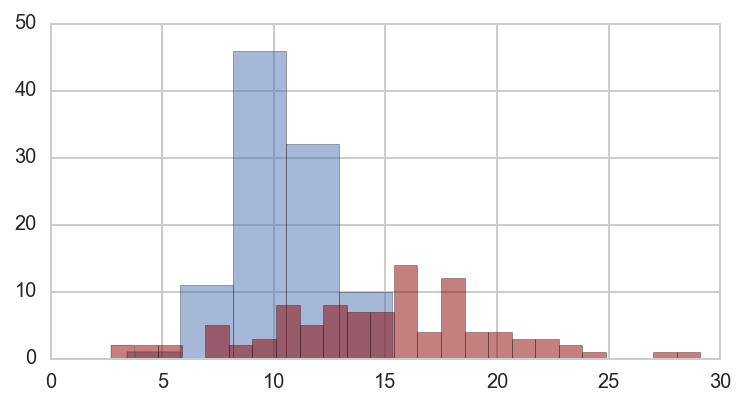

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))

#ax = sns.distplot(d['BOND AMOUNT'], kde=False, ax=ax, bins=1000)

ax.hist(np.random.normal(10, 2, size=100), bins=5, alpha=0.5)

ax.hist(np.random.normal(15, 5, size=100), bins=25, alpha=0.5, color='darkred')

plt.show()

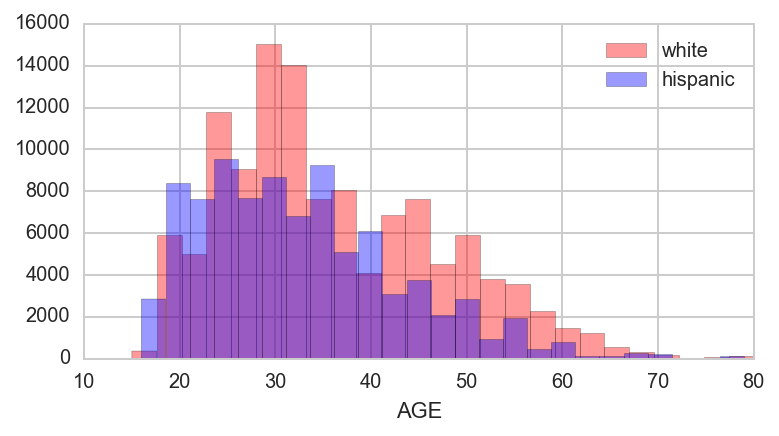

In [95]:
# 2. Plot age distribution of white and hispanic people on the same chart.

fig, ax = plt.subplots(1, 1, figsize=(6, 3))

sns.distplot(d['AGE'][d['RACE'] == 'WHITE'], 
             bins = 25, ax=ax, color = 'red', 
             kde=False, label='white')
sns.distplot(d['AGE'][d['RACE'] == 'HISPANIC'], 
             bins = 25, ax=ax, color = 'blue',
             kde=False, label='hispanic')

ax.legend(loc='upper right')

plt.show()



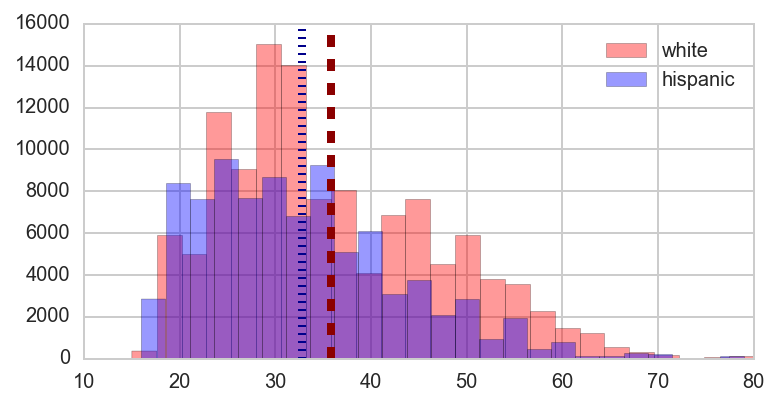

In [99]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))

ax.hist(d[d.RACE == 'WHITE'].AGE, bins=25, 
        color='red', label='white', alpha=0.4)

ax.axvline(x=np.mean(d[d.RACE == 'WHITE'].AGE), lw=4, 
           color='darkred', ls='dashed')

ax.hist(d[d.RACE == 'HISPANIC'].AGE, bins=25, 
        color='blue', label='hispanic', alpha=0.4)

ax.axvline(x=np.mean(d[d.RACE == 'HISPANIC'].AGE), 
           lw=4, color='darkblue', ls='dotted')

ax.legend(loc='upper right')

plt.show()


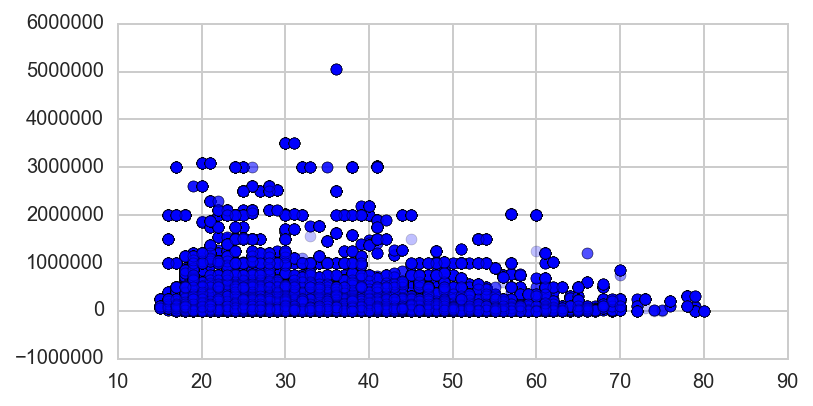

In [101]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.scatter(d['AGE'], d['BOND AMOUNT'], s=30, alpha=0.25)
plt.show()

In [ ]:
# 3. Age vs. bond amount for Asian, Hispanic, and AMER IND in different colors
# bonus: add a legend.MER IND"]["AGE"]

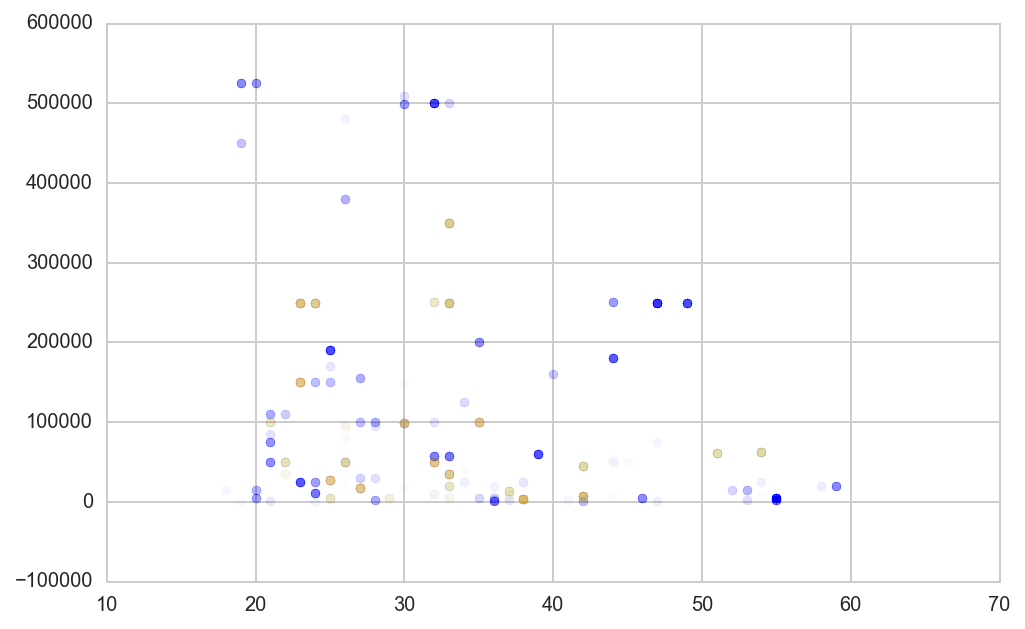

In [112]:
hisp_age = d[d["RACE"]=="HISPANIC"]["AGE"]
asian_age = d[d["RACE"]=="ASIAN"]["AGE"]
ind_age = d[d["RACE"]=="AMER IND"]["AGE"]

hisp_bond = d[d["RACE"]=="HISPANIC"]["BOND AMOUNT"]
asian_bond = d[d["RACE"]=="ASIAN"]["BOND AMOUNT"]
ind_bond = d[d["RACE"]=="AMER IND"]["BOND AMOUNT"]


fig, ax = plt.subplots(1, 1, figsize=(8, 5))
#ax.scatter(hisp_age, hisp_bond, s=20, alpha=0.01,color="red")
ax.scatter(asian_age, asian_bond, s=20, alpha=0.01, color="blue")
ax.scatter(ind_age, ind_bond, s=20, alpha=0.01, color= "goldenrod")




In [100]:
d.offense_code.unique()

array(['AM', 'M', 'DF', 'BM', nan, 'F', 'BF', 'AF', 'CF', 'CM', 'C', 'UM'], dtype=object)

In [102]:
d.RACE.unique()

array(['WHITE', 'BLACK', 'HISPANIC', 'ASIAN', 'AMER IND'], dtype=object)

In [25]:
sc.get_student()

'spencer'

In [3]:
import pandas as pd

df = pd.read_csv("../../../../DSI-SF/datasets/black_friday_incidents/Incidents.csv")
df.head(5)

,Name,Link to article,Year,Deaths,Injuries,Place,Place (State),Store / Location,Cause of Death / Injury
0,10 Injured in Southern California Black Friday...,http://abclocal.go.com/kabc/story?section=news...,2006,0,10,"Torrance, California",California,Del Amo Fashion Center,Stampede
1,"Salt Lake Tribune, The : Red-hot on Black Friday‎",http://nl.newsbank.com/nl-search/we/Archives?p...,2006,0,1,"Murray, Utah",Utah,Fashion Place Mall,Stampede
2,Worker dies at Long Island Wal-Mart after bein...,http://www.nydailynews.com/new-york/worker-die...,2008,1,4,"Long Island, New York",New York,Wal-Mart,Stampede
3,Southern California Toys 'R' Us Shooting Leave...,http://www.huffingtonpost.com/2008/11/28/socal...,2008,2,2,"Palm Desert, California",California,Toys 'R' Us,Shooting
4,Clarksville Woman Trampled During Black Friday...,http://www.newschannel5.com/global/story.asp?s...,2009,0,1,"Clarksville, Tennessee",Tennessee,Toys 'R' Us,Stampede


In [4]:
# Investigate types, most common cause of injury by year

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 9 columns):
Name                       27 non-null object
Link to article            27 non-null object
Year                       27 non-null int64
Deaths                     27 non-null int64
Injuries                   27 non-null int64
Place                      27 non-null object
Place (State)              27 non-null object
Store / Location           27 non-null object
Cause of Death / Injury    27 non-null object
dtypes: int64(3), object(6)
memory usage: 2.0+ KB


In [5]:
df.head()

,Name,Link to article,Year,Deaths,Injuries,Place,Place (State),Store / Location,Cause of Death / Injury
0,10 Injured in Southern California Black Friday...,http://abclocal.go.com/kabc/story?section=news...,2006,0,10,"Torrance, California",California,Del Amo Fashion Center,Stampede
1,"Salt Lake Tribune, The : Red-hot on Black Friday‎",http://nl.newsbank.com/nl-search/we/Archives?p...,2006,0,1,"Murray, Utah",Utah,Fashion Place Mall,Stampede
2,Worker dies at Long Island Wal-Mart after bein...,http://www.nydailynews.com/new-york/worker-die...,2008,1,4,"Long Island, New York",New York,Wal-Mart,Stampede
3,Southern California Toys 'R' Us Shooting Leave...,http://www.huffingtonpost.com/2008/11/28/socal...,2008,2,2,"Palm Desert, California",California,Toys 'R' Us,Shooting
4,Clarksville Woman Trampled During Black Friday...,http://www.newschannel5.com/global/story.asp?s...,2009,0,1,"Clarksville, Tennessee",Tennessee,Toys 'R' Us,Stampede


In [28]:
import pandas as pd
import numpy as np


gdf = df.groupby(['Year','Cause of Death / Injury']).count()



In [35]:
mask = gdf['Name'] > 1
mask

Year  Cause of Death / Injury
2006  Stampede                    True
2008  Shooting                   False
      Stampede                   False
2009  Stampede                   False
2010  Assault                    False
      Stabbing                   False
2011  Car Accident               False
      Fight                      False
      Heart Problems             False
      Pepper Spray                True
      Robbery Attempt            False
      Shooting                   False
      Stampede                   False
2012  Car Accident                True
      Shooting                   False
2013  Car Accident               False
      Fall                       False
      Fight                      False
      Pepper Spray, Fight        False
      Shooting                    True
      Stabbing                    True
      Stampede                   False
Name: Name, dtype: bool

In [36]:
# Filter out entries with count < 2

gdf_mask = gdf[mask]
gdf_mask

Name  Link to article  Deaths  Injuries  Place  \
Year Cause of Death / Injury                                                   
2006 Stampede                    2                2       2         2      2   
2011 Pepper Spray                2                2       2         2      2   
2012 Car Accident                2                2       2         2      2   
2013 Shooting                    2                2       2         2      2   
     Stabbing                    2                2       2         2      2   

                              Place (State)  Store / Location  
Year Cause of Death / Injury                                   
2006 Stampede                             2                 2  
2011 Pepper Spray                         2                 2  
2012 Car Accident                         2                 2  
2013 Shooting                             2                 2  
     Stabbing                             2                 2

In [58]:
# Alternative to masking can be accomplished with map / apply
gdf[gdf['Name'].apply(lambda value: value > 1)]

Name  Link to article  Deaths  Injuries  Place  \
Year Cause of Death / Injury                                                   
2006 Stampede                    2                2       2         2      2   
2011 Pepper Spray                2                2       2         2      2   
2012 Car Accident                2                2       2         2      2   
2013 Shooting                    2                2       2         2      2   
     Stabbing                    2                2       2         2      2   

                              Place (State)  Store / Location  
Year Cause of Death / Injury                                   
2006 Stampede                             2                 2  
2011 Pepper Spray                         2                 2  
2012 Car Accident                         2                 2  
2013 Shooting                             2                 2  
     Stabbing                             2                 2

In [65]:
sc.get_student()

'rashim'

In [51]:
## How does .count() aggregation work?
## .count() only cares about non-null values.  Notice the np.nan values do not get counted

raw_data = [
    {"Team": "A", "Interceptions": 1, "Beers Drank": 0},
    {"Team": "A", "Interceptions": 1, "Beers Drank": 500},
    {"Team": "B", "Interceptions": 1, "Beers Drank": 0},
    {"Team": "B", "Interceptions": np.nan, "Beers Drank": 0},
    {"Team": "B", "Interceptions": np.nan, "Beers Drank": 0},
]

test_df = pd.DataFrame(raw_data)
# test_df
test_df.groupby("Team").count()

,Beers Drank,Interceptions
Team,,
A,2,2
B,3,1


In [62]:
# 1. Which years had the highest deathtoll 
# 2. follow-up: place with highest injuries
df[['Year', 'Deaths']].groupby('Year').sum().sort_values(by = 'Deaths', ascending = False).head(5)

,Deaths
Year,
2008,3
2012,2
2011,1
2013,1
2006,0


In [63]:
df[df['Year'] == 2008]

,Name,Link to article,Year,Deaths,Injuries,Place,Place (State),Store / Location,Cause of Death / Injury
2,Worker dies at Long Island Wal-Mart after bein...,http://www.nydailynews.com/new-york/worker-die...,2008,1,4,"Long Island, New York",New York,Wal-Mart,Stampede
3,Southern California Toys 'R' Us Shooting Leave...,http://www.huffingtonpost.com/2008/11/28/socal...,2008,2,2,"Palm Desert, California",California,Toys 'R' Us,Shooting


In [67]:
# 2. follow-up: place with highest injuries
df.head(2)

,Name,Link to article,Year,Deaths,Injuries,Place,Place (State),Store / Location,Cause of Death / Injury
0,10 Injured in Southern California Black Friday...,http://abclocal.go.com/kabc/story?section=news...,2006,0,10,"Torrance, California",California,Del Amo Fashion Center,Stampede
1,"Salt Lake Tribune, The : Red-hot on Black Friday‎",http://nl.newsbank.com/nl-search/we/Archives?p...,2006,0,1,"Murray, Utah",Utah,Fashion Place Mall,Stampede


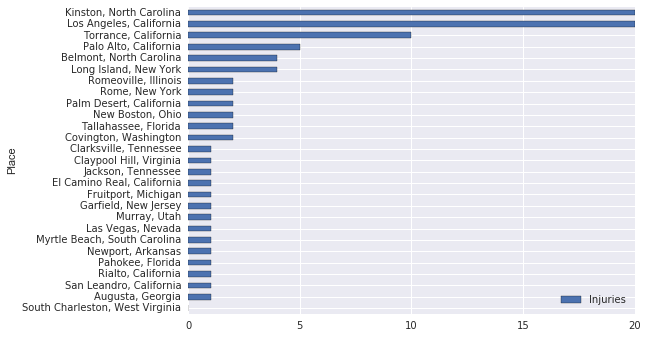

In [80]:

import seaborn as sns

# Which injury type has the most indcidents by place?
incident = df.groupby('Place')[['Injuries']].sum()
incident.sort_values('Injuries').plot(kind="barh")

In [82]:
df.head(5)

,Name,Link to article,Year,Deaths,Injuries,Place,Place (State),Store / Location,Cause of Death / Injury
0,10 Injured in Southern California Black Friday...,http://abclocal.go.com/kabc/story?section=news...,2006,0,10,"Torrance, California",California,Del Amo Fashion Center,Stampede
1,"Salt Lake Tribune, The : Red-hot on Black Friday‎",http://nl.newsbank.com/nl-search/we/Archives?p...,2006,0,1,"Murray, Utah",Utah,Fashion Place Mall,Stampede
2,Worker dies at Long Island Wal-Mart after bein...,http://www.nydailynews.com/new-york/worker-die...,2008,1,4,"Long Island, New York",New York,Wal-Mart,Stampede
3,Southern California Toys 'R' Us Shooting Leave...,http://www.huffingtonpost.com/2008/11/28/socal...,2008,2,2,"Palm Desert, California",California,Toys 'R' Us,Shooting
4,Clarksville Woman Trampled During Black Friday...,http://www.newschannel5.com/global/story.asp?s...,2009,0,1,"Clarksville, Tennessee",Tennessee,Toys 'R' Us,Stampede


In [86]:
# Create new feature "clean_state" based on the "Place" feature's 2nd element (delimited by comma)
# sc.get_student()
# df.head(5)
#df["clean_state"] = 5
clean_state = []
for row in df['Place']:
    clean_state.append(row.split(',')[1])
df['clean_state']=clean_state
df

,Name,Link to article,Year,Deaths,Injuries,Place,Place (State),Store / Location,Cause of Death / Injury,clean_state
0,10 Injured in Southern California Black Friday...,http://abclocal.go.com/kabc/story?section=news...,2006,0,10,"Torrance, California",California,Del Amo Fashion Center,Stampede,California
1,"Salt Lake Tribune, The : Red-hot on Black Friday‎",http://nl.newsbank.com/nl-search/we/Archives?p...,2006,0,1,"Murray, Utah",Utah,Fashion Place Mall,Stampede,Utah
2,Worker dies at Long Island Wal-Mart after bein...,http://www.nydailynews.com/new-york/worker-die...,2008,1,4,"Long Island, New York",New York,Wal-Mart,Stampede,New York
3,Southern California Toys 'R' Us Shooting Leave...,http://www.huffingtonpost.com/2008/11/28/socal...,2008,2,2,"Palm Desert, California",California,Toys 'R' Us,Shooting,California
4,Clarksville Woman Trampled During Black Friday...,http://www.newschannel5.com/global/story.asp?s...,2009,0,1,"Clarksville, Tennessee",Tennessee,Toys 'R' Us,Stampede,Tennessee
5,Transwoman assaulted at Kohl's Department Stor...,http://grand-divisions.blogspot.com/2010/12/tr...,2010,0,1,"Jackson, Tennessee",Tennessee,Kohl's,Assault,Tennessee
6,Former Marine stabbed in Best Buy store by vio...,http://nypost.com/2010/11/26/former-marine-sta...,2010,0,1,"Augusta, Georgia",Georgia,Best Buy,Stabbing,Georgia
7,Black Friday: Target Shoppers Step Over Walter...,http://www.huffingtonpost.com/2011/11/27/black...,2011,1,0,"South Charleston, West Virginia",West Virginia,Target,Heart Problems,West Virginia
8,Girl trampled in Black Friday Wal-Mart rush,http://www.mlive.com/news/muskegon/index.ssf/2...,2011,0,1,"Fruitport, Michigan",Michigan,Wal-Mart,Stampede,Michigan
9,Black Friday Worker Rescued From Canal After L...,http://www.huffingtonpost.com/2011/11/26/black...,2011,0,1,"Pahokee, Florida",Florida,Not Applicable (On the Road),Car Accident,Florida


In [98]:
df[['Place']].apply(lambda row_value: 1 if len(row_value) > 15 else 0)


Place    1
dtype: int64